# Table Of Contents
* [Setup Environment](#setup-env)
* [Embedded Genome Browser](#genome-browser)
* [Setup Data](#setup-data)  
* [Quality Control](#quality-control)  
* [Trimming&Aligning](#alignment)
    * [Build Genome Index](#build-genome-index)
    * [Downsample](#downsample)
    * [Reads Filtering](#reads-filtering)
* [Obtain Coverage Files genomic tracks](#coverage-files)
* [Peak Calling](#peak-calling)
* [Downstream Analysis](#downstream)

# Setup environment  <a class="anchor" id="setup-env"></a>

In [1]:
%load_ext rpy2.ipython 
# why: https://evodify.com/python-r-bash-jupyter-notebook/

/home/ionelia/.local/lib/python3.10/site-packages/rpy2/ipython/rmagic.py:74: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded (error: No module named 'pandas'), but at least we found `numpy`.
  warnings.warn('The Python package `pandas` is strongly '


In [ ]:
%%bash
mkdir -p maria/tools
wget -P maria/tools https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
cd maria/tools
unzip fastqc_v0.11.9.zip && cd ..

In [ ]:
# 1st method installations with apt
%%bash
apt install fastqc
apt install bowtie2
apt install sra-toolkit 

In [ ]:
# 2nd method install packages from source

install sra toolkit form source --> https://github.com/ncbi/sra-tools/wiki/02.-Installing-SRA-Toolkit

### Load and install python packages

In [3]:
# install python packages
# todo

# load python packages
from IPython.display import IFrame

[1] 2


### Install and load R packages

In [ ]:
%%R
packages = ("dplyr", "ggplot2", "viridis")
for package in packages {
    install.packages(package)
}

install.packages("ggpubr")
install.packages('corrplot')

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

library(BiocParallel)
register(MulticoreParam(8)) # Use 8 cores

BiocManager::install("GenomicRanges")
BiocManager::install("chromVAR")
BiocManager::install("DESeq2")
BiocManager::install("chromVAR")

In [ ]:
%%R
library(BiocParallel)
register(MulticoreParam(8)) # Use 8 cores

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("chromVAR")
BiocManager::install("MatrixGenerics")
BiocManager::install("DESeq2")

In [4]:
%%R
library(dplyr)
library(stringr)
library(ggplot2)
library(viridis)
library(GenomicRanges)
library(chromVAR) ## For FRiP analysis and differential analysis
library(DESeq2) ## For differential analysis section
library(ggpubr) ## For customizing figures
library(corrplot) ## For correlation plot

# Embedded Genome Browser <a class="anchor" id="genome-browser"> </a>

In [ ]:
url = 'https://igv.org/app/'
IFrame(url, width=1200, height=400)

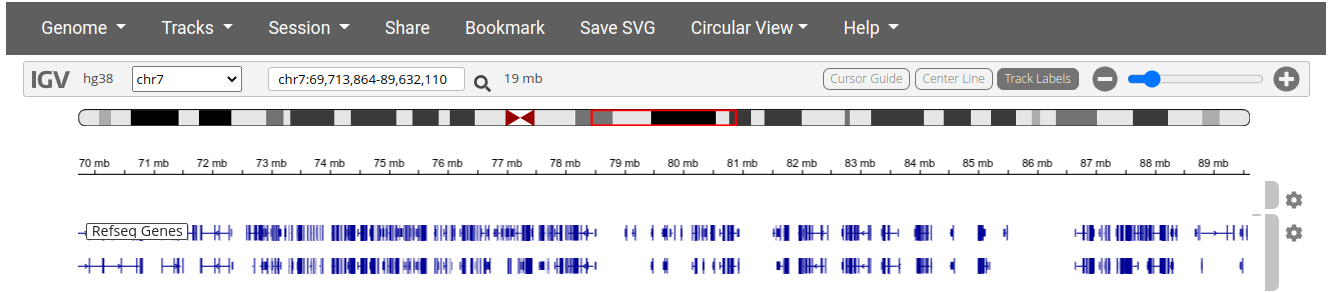

## Setup data <a class="anchor" id="setup-data"></a>

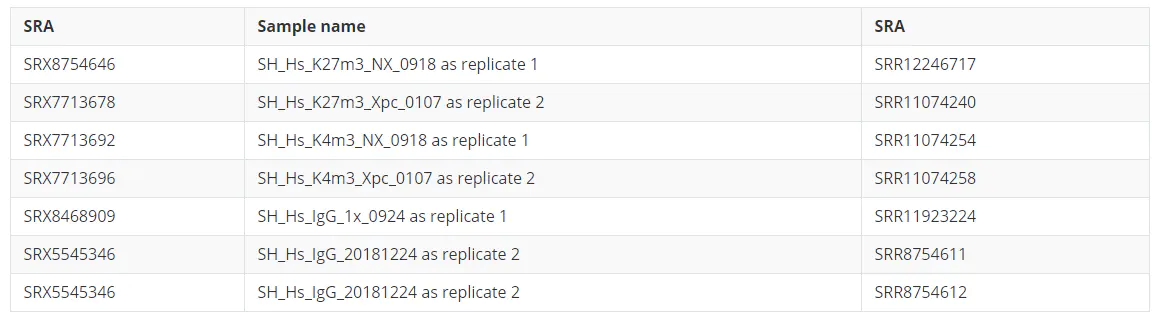

In [ ]:
# download data

In [13]:
!cd maria/data/

In [2]:
!fastq-dump --split-3 SRR12246717

Read 2984630 spots for SRR12246717
Written 2984630 spots for SRR12246717


In [ ]:
!mv SRR12246717_1.fastq "SRR12246717_1_K27me3_rep1_R1.fastq"
!mv SRR12246717_2.fastq "SRR12246717_2_K27me3_rep1_R2.fastq"

# Quality Control <a class="anchor" id="quality-control"> </a>

In [5]:
%%bash

mkdir -p ./fastqc-output/K27me3_rep1

fastqc -o fastqc-output/K27me3_rep1 -f fastq SRR12246717_1_K27me3_rep1_R1.fastq # left read

fastqc -o fastqc-output/K27me3_rep1 -f fastq SRR12246717_2_K27me3_rep1_R2.fastq # right read

Started analysis of SRR12246717_1_K27me3_rep1_R1.fastq
Approx 5% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 10% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 15% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 20% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 25% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 30% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 35% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 40% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 45% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 50% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 55% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 60% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 65% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 70% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 75% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Approx 80% complete for SRR12246717_1_K27me3_rep1_R1.fastq
Ap

Analysis complete for SRR12246717_1_K27me3_rep1_R1.fastq


Started analysis of SRR12246717_2_K27me3_rep1_R2.fastq
Approx 5% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 10% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 15% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 20% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 25% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 30% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 35% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 40% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 45% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 50% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 55% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 60% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 65% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 70% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 75% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Approx 80% complete for SRR12246717_2_K27me3_rep1_R2.fastq
Ap

Analysis complete for SRR12246717_2_K27me3_rep1_R2.fastq


In [7]:
!ls fastqc-output/K27me3_rep1/

SRR12246717_1_K27me3_rep1_R1_fastqc.html
SRR12246717_1_K27me3_rep1_R1_fastqc.zip
SRR12246717_2_K27me3_rep1_R2_fastqc.html
SRR12246717_2_K27me3_rep1_R2_fastqc.zip


In [10]:
IFrame(src="fastqc-output/K27me3_rep1/SRR12246717_2_K27me3_rep1_R2_fastqc.html", width='100%', height='1000px')

In [10]:
IFrame(src="fastqc-output/K27me3_rep1/SRR12246717_2_K27me3_rep1_R2_fastqc.html", width='100%', height='1000px')

# Alignment <a class="anchor" id="alignment"> </a>

## [Optional] Build Reference Genome <a class="anchor" id="build-genome-index"> </a>

In [25]:
# download UCSC Genome Browser’s hg38 human reference sequence, the link
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz

--2022-11-12 17:20:11--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938,09M  6,29MB/s    in 3m 26s  

2022-11-12 17:23:39 (4,55 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]



In [26]:
!gunzip hg38.fa.gz

In [27]:
!bowtie2-build hg38.fa hg38_index_file

Settings:
  Output files: "hg38_index_file.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  hg38.fa
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:20
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:16
bmax according to bmaxDivN setting: 762328945
Using parameters --bmax 571746709 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 571746709 --dcv 1024
Constructing suffix-ar

In [28]:
!mkdir hg38-index-file && mv hg38_index* hg38-index-file

In [13]:
%%bash
mkdir -p alignment/sam/bowtie2_summary
mkdir -p alignment/bam
mkdir -p alignment/bed
mkdir -p alignment/bedgraph

In [14]:
!bowtie2 --end-to-end --very-sensitive --no-mixed --no-discordant --phred33 -I 10 -X 700 -p 6 -x hg38/hg38_index_file \
    -1 SRR12246717_1_K27me3_rep1_R1.fastq \
    -2 SRR12246717_2_K27me3_rep1_R2.fastq \
    -S alignment/sam/SRR12246717_K27me3_rep1_bowtie2.sam &> alignment/sam/bowtie2_summary/SRR12246717_K27me3_rep1_bowtie2.txt

In [18]:
!cat alignment/sam/bowtie2_summary/SRR12246717_K27me3_rep1_bowtie2.txt

2984630 reads; of these:
  2984630 (100.00%) were paired; of these:
    123402 (4.13%) aligned concordantly 0 times
    2276964 (76.29%) aligned concordantly exactly 1 time
    584264 (19.58%) aligned concordantly >1 times
95.87% overall alignment rate


## [optional] Alignment to spike-in genome for spike-in calibration

In [31]:
!bowtie2-build ecoli.fasta bowtie2Index/ecoli

Settings:
  Output files: "bowtie2Index/ecoli.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ecoli.fasta
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 1157453
Using parameters --bmax 868090 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 868090 --dcv 1024
Constructing suffix-arr

In [34]:
%%time
chromSize="/fh/fast/gottardo_r/yezheng_working/SupplementaryData/hg38/chromSize/hg38.chrom.size"

!bowtie2 --end-to-end --very-sensitive --no-mixed --no-discordant --phred33 -I 10 -X 700 -p 6 -x bowtie2Indexes/ecoli/ecoli \
    -1 SRR12246717_1_K27me3_rep1_R1.fastq \
    -2 SRR12246717_2_K27me3_rep1_R2.fastq \
    -S alignment/sam/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.sam &> alignment/sam/bowtie2_summary/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.txt

CPU times: user 104 ms, sys: 17.1 ms, total: 121 ms
Wall time: 7.99 s


In [35]:
!cat alignment/sam/bowtie2_summary/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.txt

2984630 reads; of these:
  2984630 (100.00%) were paired; of these:
    2984379 (99.99%) aligned concordantly 0 times
    240 (0.01%) aligned concordantly exactly 1 time
    11 (0.00%) aligned concordantly >1 times
0.01% overall alignment rate


In [37]:
%%bash
seqDepthDouble=`samtools view -F 0x04 alignment/sam/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.sam | wc -l`
seqDepth=$((seqDepthDouble/2))
echo $seqDepth >alignment/sam/bowtie2_summary/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.seqDepth
cat alignment/sam/bowtie2_summary/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.seqDepth

251


In [39]:
%%R
projPath = "./"
sampleList = c("K27me3_rep1") # , "K27me3_rep2", "K4me3_rep1", "K4me3_rep2", "IgG_rep1", "IgG_rep2")
histList = c("K27me3") #, "K4me3", "IgG")

## Collect the alignment results from the bowtie2 alignment summary files
alignResult = c()
for(hist in sampleList){
  alignRes = read.table(paste0(projPath, "alignment/sam/bowtie2_summary/SRR12246717_K27me3_rep1_bowtie2.txt"), header = FALSE, fill = TRUE)
  alignRate = substr(alignRes$V1[6], 1, nchar(as.character(alignRes$V1[6]))-1)
  histInfo = strsplit(hist, "_")[[1]]
  alignResult = data.frame(Histone = histInfo[1], Replicate = histInfo[2], 
                           SequencingDepth = alignRes$V1[1] %>% as.character %>% as.numeric, 
                           MappedFragNum_hg38 = alignRes$V1[4] %>% as.character %>% as.numeric + alignRes$V1[5] %>% as.character %>% as.numeric, 
                           AlignmentRate_hg38 = alignRate %>% as.numeric)  %>% rbind(alignResult, .)
}
alignResult$Histone = factor(alignResult$Histone, levels = histList)
alignResult %>% mutate(AlignmentRate_hg38 = paste0(AlignmentRate_hg38, "%"))

  Histone Replicate SequencingDepth MappedFragNum_hg38 AlignmentRate_hg38
1  K27me3      rep1         2984630            2861228             95.87%


In [41]:
%%R
spikeAlign = c()
for(hist in sampleList){
  spikeRes = read.table(paste0(projPath, "alignment/sam/bowtie2_summary/SRR12246717_1_K27me3_rep1_bowtie2_spikeIn.txt"), header = FALSE, fill = TRUE)
  alignRate = substr(spikeRes$V1[6], 1, nchar(as.character(spikeRes$V1[6]))-1)
  histInfo = strsplit(hist, "_")[[1]]
  spikeAlign = data.frame(Histone = histInfo[1], Replicate = histInfo[2], 
                          SequencingDepth = spikeRes$V1[1] %>% as.character %>% as.numeric, 
                          MappedFragNum_spikeIn = spikeRes$V1[4] %>% as.character %>% as.numeric + spikeRes$V1[5] %>% as.character %>% as.numeric, 
                          AlignmentRate_spikeIn = alignRate %>% as.numeric)  %>% rbind(spikeAlign, .)
}
spikeAlign$Histone = factor(spikeAlign$Histone, levels = histList)
spikeAlign %>% mutate(AlignmentRate_spikeIn = paste0(AlignmentRate_spikeIn, "%"))

  Histone Replicate SequencingDepth MappedFragNum_spikeIn AlignmentRate_spikeIn
1  K27me3      rep1         2984630                   251                 0.01%


In [42]:
%%R
alignSummary = left_join(alignResult, spikeAlign, by = c("Histone", "Replicate", "SequencingDepth")) %>%
  mutate(AlignmentRate_hg38 = paste0(AlignmentRate_hg38, "%"), 
         AlignmentRate_spikeIn = paste0(AlignmentRate_spikeIn, "%"))
alignSummary

  Histone Replicate SequencingDepth MappedFragNum_hg38 AlignmentRate_hg38
1  K27me3      rep1         2984630            2861228             95.87%
  MappedFragNum_spikeIn AlignmentRate_spikeIn
1                   251                 0.01%


### [optional] Remove Duplicates

In [ ]:
todo

### File format conversion sam format $\rightarrow$ bam format <a class="anchor" id="sam2bam"> </a>

In [8]:
## Filter and keep the mapped read pairs
!samtools view -bS -F 0x04 alignment/sam/SRR12246717_K27me3_rep1_bowtie2.sam > alignment/bam/SRR12246717_K27me3_rep1_bowtie2.mapped.bam

In [10]:
## Convert into bed file format
!bedtools bamtobed -i alignment/bam/SRR12246717_K27me3_rep1_bowtie2.mapped.bam -bedpe >alignment/bed/SRR12246717_K27me3_rep1_bowtie2.bed

In [11]:
## Keep the read pairs that are on the same chromosome and fragment length less than 1000bp.
!awk '$1==$4 && $6-$2 < 1000 {print $0}' alignment/bed/SRR12246717_K27me3_rep1_bowtie2.bed >alignment/bed/SRR12246717_K27me3_rep1_bowtie2.clean.bed

In [13]:
## Only extract the fragment related columns
!cut -f 1,2,6 alignment/bed/SRR12246717_K27me3_rep1_bowtie2.clean.bed | sort -k1,1 -k2,2n -k3,3n  >alignment/bed/SRR12246717_K27me3_rep1_bowtie2.fragments.bed

## Spike-in Calibration

In [15]:
%%bash
if [[ "$seqDepth" -gt "1" ]]; then
    
    mkdir -p alignment/bedgraph

    scale_factor=`echo "10000 / $seqDepth" | bc -l`
    echo "Scaling factor for $histName is: $scale_factor!"
    bedtools genomecov -bg -scale $scale_factor \
    -i alignment/bed/SRR12246717_K27me3_rep1_bowtie2.fragments.bed \
    -g $chromSize > alignment/bedgraph/SRR12246717_K27me3_rep1_bowtie2.fragments.normalized.bedgraph
    
fi

In [ ]:
%%R
scaleFactor = c()
multiplier = 10000

spikeDepth = read.table(paste0("alignment/sam/bowtie2_summary/", "SRR12246717_K27me3_rep1_", "_bowtie2_spikeIn.seqDepth"), header = FALSE, fill = TRUE)$V1[1]
  
histInfo = strsplit(hist, "_")[[1]]
scaleFactor = data.frame(scaleFactor = multiplier/spikeDepth, Histone = histInfo[1], Replicate = histInfo[2])  %>% rbind(scaleFactor, .)
                               
scaleFactor$Histone = factor(scaleFactor$Histone, levels = histList)
left_join(alignDupSummary, scaleFactor, by = c("Histone", "Replicate"))

In [ ]:
%%R
##=== R command ===##
## Generate sequencing depth boxplot
fig6A = scaleFactor %>% ggplot(aes(x = Histone, y = scaleFactor, fill = Histone)) +
    geom_boxplot() +
    geom_jitter(aes(color = Replicate), position = position_jitter(0.15)) +
    scale_fill_viridis(discrete = TRUE, begin = 0.1, end = 0.9, option = "magma", alpha = 0.8) +
    scale_color_viridis(discrete = TRUE, begin = 0.1, end = 0.9) +
    theme_bw(base_size = 20) +
    ylab("Spike-in Scalling Factor") +
    xlab("")

normDepth = inner_join(scaleFactor, alignResult, by = c("Histone", "Replicate")) %>% mutate(normDepth = MappedFragNum_hg38 * scaleFactor)

fig6B = normDepth %>% ggplot(aes(x = Histone, y = normDepth, fill = Histone)) +
    geom_boxplot() +
    geom_jitter(aes(color = Replicate), position = position_jitter(0.15)) +
    scale_fill_viridis(discrete = TRUE, begin = 0.1, end = 0.9, option = "magma", alpha = 0.8) +
    scale_color_viridis(discrete = TRUE, begin = 0.1, end = 0.9) +
    theme_bw(base_size = 20) +
    ylab("Normalization Fragment Count") +
    xlab("") + 
    coord_cartesian(ylim = c(1000000, 130000000))
ggarrange(fig6A, fig6B, ncol = 2, common.legend = TRUE, legend="bottom")

In [ ]:
%%R
##=== R command ===##
## Generate sequencing depth boxplot
fig6A = scaleFactor %>% ggplot(aes(x = Histone, y = scaleFactor, fill = Histone)) +
    geom_boxplot() +
    geom_jitter(aes(color = Replicate), position = position_jitter(0.15)) +
    scale_fill_viridis(discrete = TRUE, begin = 0.1, end = 0.9, option = "magma", alpha = 0.8) +
    scale_color_viridis(discrete = TRUE, begin = 0.1, end = 0.9) +
    theme_bw(base_size = 20) +
    ylab("Spike-in Scalling Factor") +
    xlab("")

normDepth = inner_join(scaleFactor, alignResult, by = c("Histone", "Replicate")) %>% mutate(normDepth = MappedFragNum_hg38 * scaleFactor)

fig6B = normDepth %>% ggplot(aes(x = Histone, y = normDepth, fill = Histone)) +
    geom_boxplot() +
    geom_jitter(aes(color = Replicate), position = position_jitter(0.15)) +
    scale_fill_viridis(discrete = TRUE, begin = 0.1, end = 0.9, option = "magma", alpha = 0.8) +
    scale_color_viridis(discrete = TRUE, begin = 0.1, end = 0.9) +
    theme_bw(base_size = 20) +
    ylab("Normalization Fragment Count") +
    xlab("") + 
    coord_cartesian(ylim = c(1000000, 130000000))
ggarrange(fig6A, fig6B, ncol = 2, common.legend = TRUE, legend="bottom")

## Downsample <a class="anchor" id="downsample"> 

## [Reads Filtering](#reads-filtering)

# Obtain Coverage Files genomic tracks <a class="anchor" id="coverage-files"> 

In [ ]:
todo

# Peak Calling <a class="anchor" id="peak-calling"></a>

In [ ]:
todo

# Downstream Analysis <a class="anchor" id="downstream"></a>

In [ ]:
todo